In [4]:
import re
import matplotlib.pyplot as plt
import numpy as np

ValueError: x and y must have same first dimension, but have shapes (100,) and (77,)

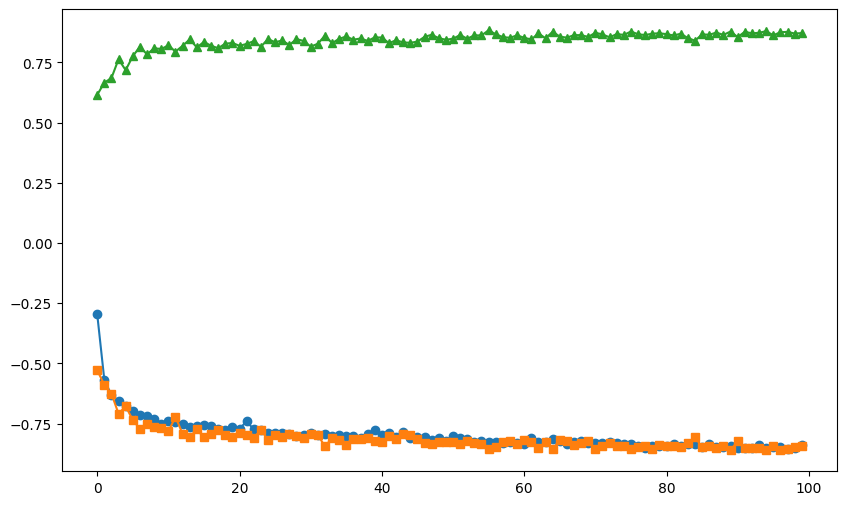

In [8]:


# File path
file_path = "training_log_2025_3_31_21_38_05.txt" 

# Initialize lists for storing values
epochs = []
train_loss = []
val_loss = []
pseudo_dice = []
moving_avg_dice = []

# Regex patterns
epoch_pattern = re.compile(r"Epoch (\d+)")
train_loss_pattern = re.compile(r"train_loss (-?\d+\.\d+)")
val_loss_pattern = re.compile(r"val_loss (-?\d+\.\d+)")
pseudo_dice_pattern = re.compile(r"Pseudo dice \[(\d+\.\d+)\]")
moving_avg_dice_pattern = re.compile(r"New best EMA pseudo Dice: (\d+\.\d+)")

# Read and parse the log file
with open(file_path, "r") as file:
    for line in file:
        epoch_match = epoch_pattern.search(line)
        if epoch_match:
            epochs.append(int(epoch_match.group(1)))
        
        train_loss_match = train_loss_pattern.search(line)
        if train_loss_match:
            train_loss.append(float(train_loss_match.group(1)))
        
        val_loss_match = val_loss_pattern.search(line)
        if val_loss_match:
            val_loss.append(float(val_loss_match.group(1)))
        
        pseudo_dice_match = pseudo_dice_pattern.search(line)
        if pseudo_dice_match:
            pseudo_dice.append(float(pseudo_dice_match.group(1)))
        
        moving_avg_dice_match = moving_avg_dice_pattern.search(line)
        if moving_avg_dice_match:
            moving_avg_dice.append(float(moving_avg_dice_match.group(1)))

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(epochs, train_loss, label="Train Loss", marker="o", linestyle="-")
plt.plot(epochs, val_loss, label="Validation Loss", marker="s", linestyle="-")
plt.plot(epochs, pseudo_dice, label="Pseudo Dice", marker="^", linestyle="-")
plt.plot(epochs, moving_avg_dice, label="Moving Avg Dice", marker="d", linestyle="-")

plt.xlabel("Epochs")
plt.ylabel("Values")
plt.title("Training Metrics Over Epochs")
plt.legend()
plt.grid(True)
plt.show()
